<a href="https://colab.research.google.com/github/CMAZ83/pgd-aiml/blob/main/ML_Beer_Consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the dataset, check its shape, Perform EDA using Pandas ProÞling -
Intermediate
2. Rectify the data of Þrst four columns - Intermediate
3. Create new features using the 'Data' feature and the make 'Data' column as index -
Intermediate
4. Handle null and duplicate values - Beginner
5. Check the data-type of the features and convert them to appropriate data-type -
Beginner
6. Analyze features with outlier values - Intermediate
7. Plot and analyze Correlation - Beginner
8. Split the dataset for training and testing - Beginner
9. Train a linear regression model and print the intercept and coe#cients - Beginner
10. Evaluate the model using R2 score, Mean Absolute Error, and root mean squared
error - Beginner

In [2]:
!wget https://www.dropbox.com/s/9tmnvhivvq4oyc7/Consumo_cerveja.csv

--2022-04-01 12:07:10--  https://www.dropbox.com/s/9tmnvhivvq4oyc7/Consumo_cerveja.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9tmnvhivvq4oyc7/Consumo_cerveja.csv [following]
--2022-04-01 12:07:10--  https://www.dropbox.com/s/raw/9tmnvhivvq4oyc7/Consumo_cerveja.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdf23e8f6a6125ca081e891a06e.dl.dropboxusercontent.com/cd/0/inline/Bilrz-UElZKQsHooWd9BNECTXNLxwuYVnM1K26ywMKLrybeQiXdUejKABTnZwUuSYqfGFcL6-5X7n9ULuaNDDLm6azTgwFi1lia_DwzSmhcDENNdqAJA6fAffqodWXGh7DlYGddirU4CCNHNCmhbhzecUmXJmkJ9XLFOiB58PH51yA/file# [following]
--2022-04-01 12:07:10--  https://ucdf23e8f6a6125ca081e891a06e.dl.dropboxusercontent.com/cd/0/inline/Bilrz-UElZKQsHooWd9BNECTXNLxwuYVnM1K26ywMKLrybe

Load and anlayze the dataset

In [3]:
import pandas as pd
df1=pd.read_csv('Consumo_cerveja.csv', parse_dates=['Data'], dayfirst=True)
#dayfirst used to consider day first instead of month
df1

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaT,NaN,NaN,NaN,NaN,NaN,NaN
937,NaT,NaN,NaN,NaN,NaN,NaN,NaN
938,NaT,NaN,NaN,NaN,NaN,NaN,NaN
939,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 25.9 MB 673 kB/s
     |████████████████████████████████| 10.9 MB 10.5 MB/s 
     |████████████████████████████████| 596 kB 36.3 MB/s 
     |████████████████████████████████| 102 kB 10.3 MB/s 
     |████████████████████████████████| 690 kB 39.0 MB/s 
     |████████████████████████████████| 4.7 MB 45.7 MB/s 
     |████████████████████████████████| 63 kB 941 kB/s 
     |████████████████████████████████| 812 kB 39.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=1ac37a8a9412624861467a62d20745d481ab30fc69e3edf2275b039bce4ba89e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ngpybsd6/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5a846dad9121bf6e8e5b59b9e79101745a38f0ff9fb562f5cee6137628b4141d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b1

In [4]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df1, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


Replace ',' with '.' in columns 'Temperatura Media (C)', 'Temperatura Minima (C)',
'Temperatura Maxima (C)', and 'Precipitacao (mm)'

In [6]:
df1['Temperatura Maxima (C)']=df1['Temperatura Maxima (C)'].str.replace(',','.')
df1['Temperatura Media (C)']=df1['Temperatura Media (C)'].str.replace(',','.')
df1['Temperatura Minima (C)']=df1['Temperatura Minima (C)'].str.replace(',','.')
df1['Precipitacao (mm)']=df1['Precipitacao (mm)'].str.replace(',','.')
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


Create new feature 'Month' from the dates, consisting of the month of the year
Create new feature 'Day' from the dates, consisting of the day of the week
Set values from 'Data' column as indexes

In [7]:
df1['Month']=df1.Data.dt.month
df1['Day']=df1.Data.dt.dayofweek

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,3.0
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,4.0
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,5.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,0.0
...,...,...,...,...,...,...,...,...,...
936,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1.iloc[335:341]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
335,2015-12-02,22.1,18.2,29.4,0,0.0,30.471,12.0,2.0
336,2015-12-03,22.44,20.2,26.1,0,0.0,28.405,12.0,3.0
337,2015-12-04,22.76,19,29.1,0,0.0,29.513,12.0,4.0
338,2015-12-05,24.8,19.5,30.6,0.1,1.0,32.451,12.0,5.0
339,2015-12-06,23.12,20.6,28,0.1,1.0,32.780,12.0,6.0
340,2015-12-07,20.04,18,23.9,47.8,0.0,23.375,12.0,0.0


In [9]:
df1.set_index('Data', inplace=True)

Only drop those instances where all values are null
Also, check the duplicate values

In [10]:
print(df1.isnull().sum())
print(df1.shape)

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
Day                            576
dtype: int64
(941, 8)


In [11]:
print(df1.isnull().all(axis=1).sum())
# calculate the number of rows which have null values in all columns

576


In [12]:
df1.shape

(941, 8)

In [14]:
df1.dropna(how='all',inplace=True)
df1.shape

(365, 8)

In [15]:
print(df1.isnull().sum())

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64


In [16]:
if df1.duplicated().any():
  print('True: Duplicate instances')
else:
  print('False: No duplicates')  

False: No duplicates


Check the data-types of the features
Convert them to appropriate data types

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   Day                          365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


In [18]:
df1['Temperatura Media (C)']=df1['Temperatura Media (C)'].astype(float)
df1['Temperatura Minima (C)']=df1['Temperatura Minima (C)'].astype(float)
df1['Temperatura Maxima (C)']=df1['Temperatura Maxima (C)'].astype(float)
df1['Precipitacao (mm)']=df1['Precipitacao (mm)'].astype(float)
df1['Final de Semana']=df1['Final de Semana'].astype(int)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   Day                          365 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 25.7 KB


In [20]:
df1.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,3.0
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,2.0
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.0
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,1.0
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,3.0
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,5.0
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,6.0


Check for outlier in all the columns using boxplot
Analyze the column with outliers

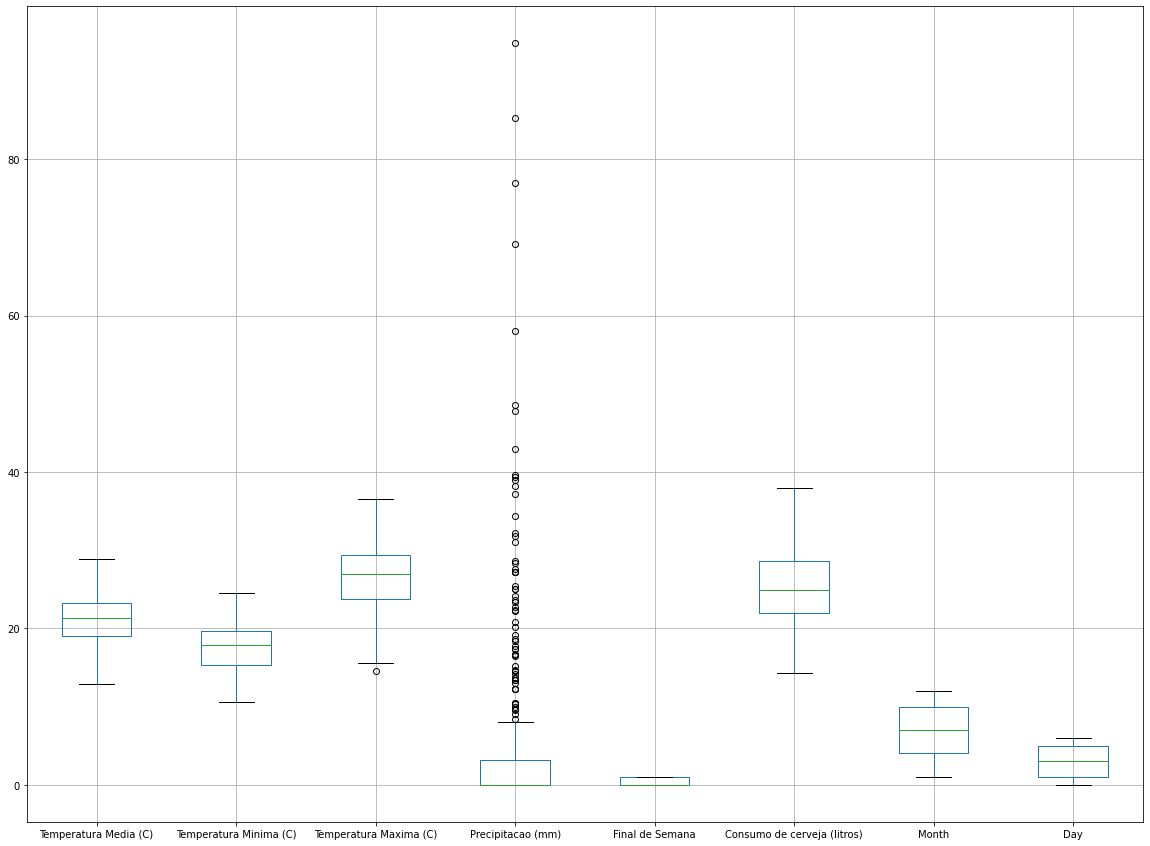

In [22]:
import matplotlib.pyplot as plt
df1.boxplot(figsize=(20,15))
plt.show()

Column 'Precipitacio' seems to have lots of outlier. Let's try to understand this using the distribution of
the data

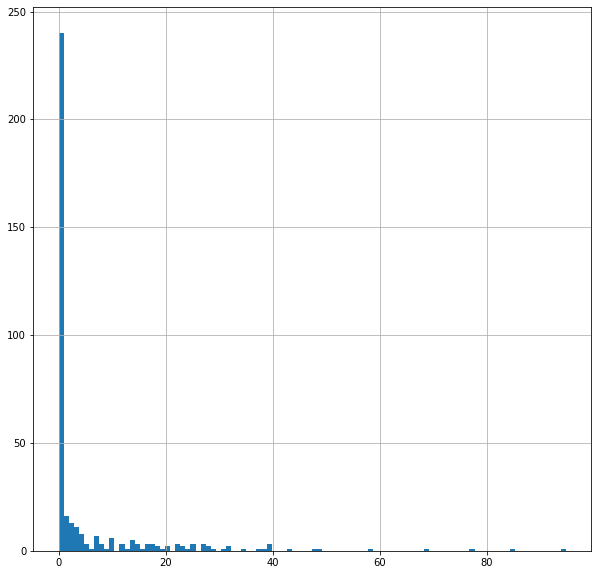

In [23]:
df1['Precipitacao (mm)'].hist(bins=100,figsize=(10,10))
plt.show()

In [24]:
print(df1['Precipitacao (mm)'][df1['Precipitacao (mm)']==0].value_counts())

0.0    218
Name: Precipitacao (mm), dtype: int64


In [26]:
import numpy as np
df1['Precipitacao (mm)'] = np.clip(df1['Precipitacao (mm)'],0,40)

Plot the correlation between features
Analyze the correlation of independent features with respect to dependent features

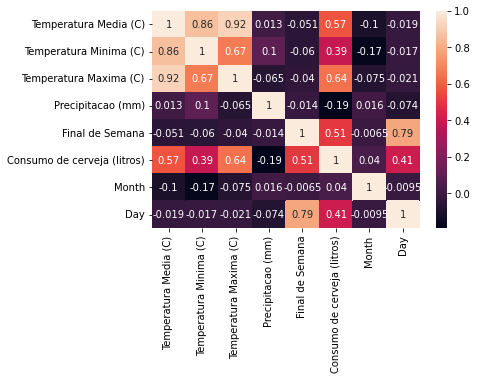

In [27]:
import seaborn as sns
correlation=df1.corr()
sns.heatmap(correlation,annot=True)

Split the dataset using sklearn, with 20% for testing with random_state=7

In [28]:
from sklearn.model_selection import train_test_split
x=df1.drop(columns=['Consumo de cerveja (litros)'],axis=1)
y=df1['Consumo de cerveja (litros)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(292, 7)
(73, 7)
(292,)
(73,)


Train a linear regression model for prediction
Also, print the coe#cients and intercept from the trained model

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print('The final coefficients after training is: ', lr.coef_)
print('The final intercept after training is: ', lr.intercept_)

The final coefficients after training is:  [-1.34341349e-01  1.22055186e-01  7.03305117e-01 -5.80658209e-02
  5.24988993e+00  1.36610989e-01  2.42604471e-03]
The final intercept after training is:  5.2991190570684275


Predict the consumption for the test data.
Evaluate the model using R2 score.
Evaluate the model using Mean Absolute Error.
Evaluate the model using Root Mean Squared Error.

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred=lr.predict(x_test)
print("r2 score for our model is: ", r2_score(y_test,y_pred))
print("Mean absolute error for our model is: ", mean_absolute_error(y_test, y_pred))
print("Root mean squared error for our model is: ", mean_squared_error(y_test,y_pred,squared=False)) 

r2 score for our model is:  0.6692125883575041
Mean absolute error for our model is:  2.0233917644808708
Root mean squared error for our model is:  2.4737414676598473
